Call:
smooth.spline(x = speed, y = dist)

Smoothing Parameter  spar= 0.7801305  lambda= 0.1112206 (11 iterations)
Equivalent Degrees of Freedom (Df): 2.635278
Penalized Criterion: 4187.776
GCV: 244.1044

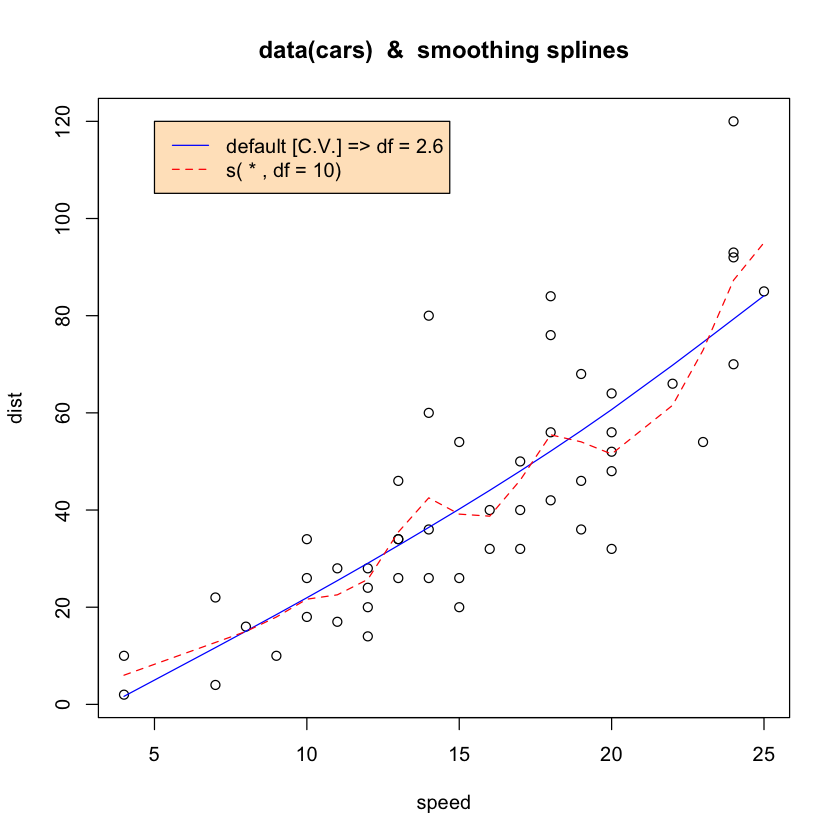

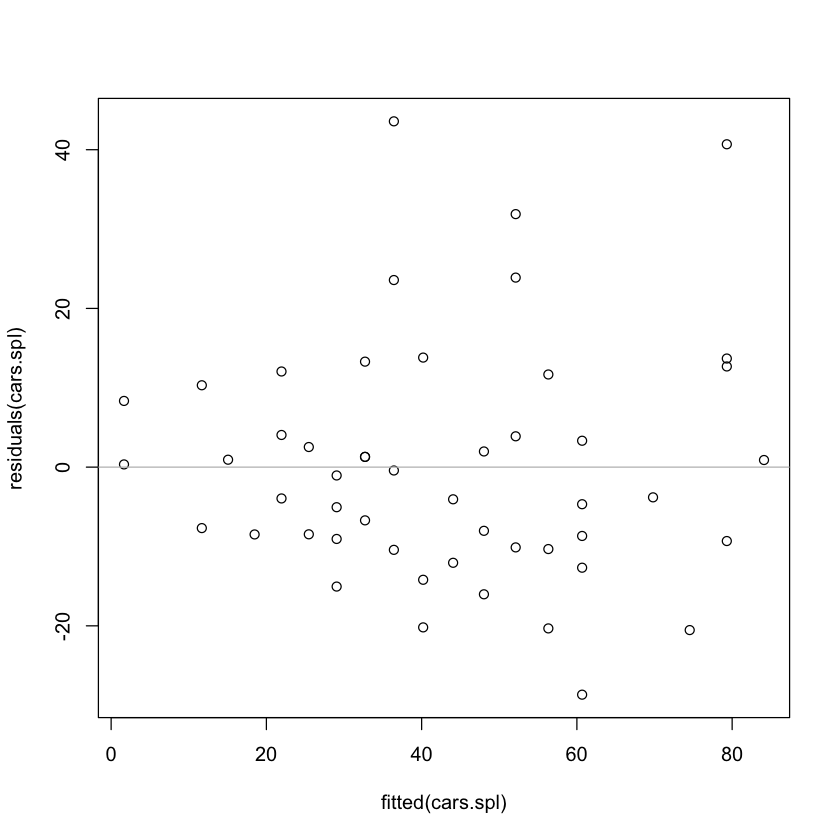

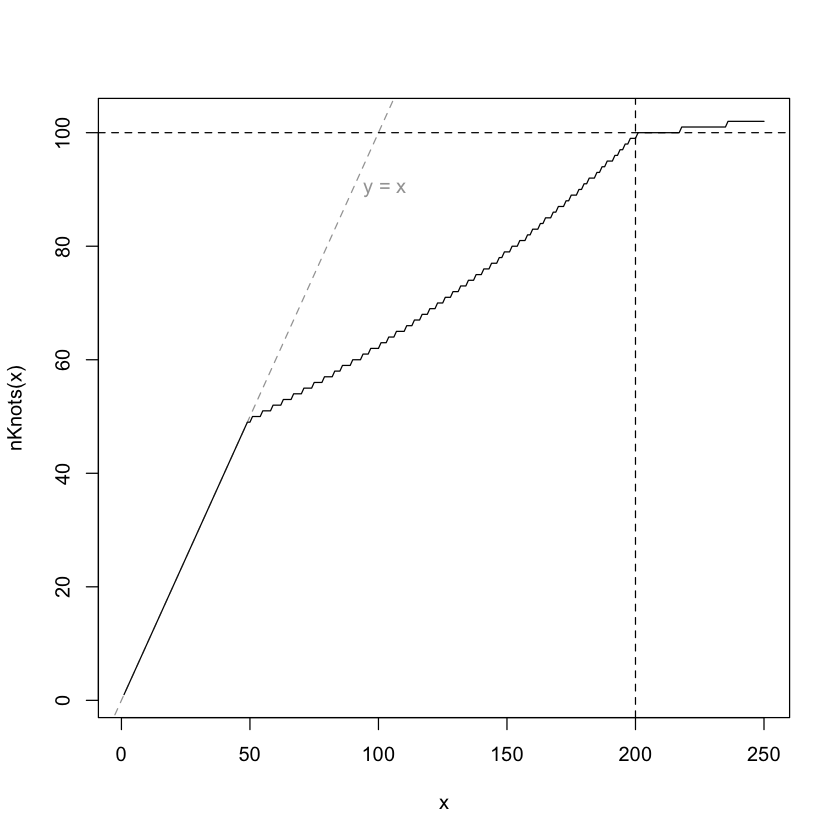

Call:
smooth.spline(x = y18)

Smoothing Parameter  spar= 0.3928105  lambda= 9.672776e-05 (13 iterations)
Equivalent Degrees of Freedom (Df): 8.494168
Penalized Criterion: 3.59204
GCV: 0.7155391

Call:
smooth.spline(x = y18, spar = 0.2)

Smoothing Parameter  spar= 0.2  lambda= 3.911187e-06
Equivalent Degrees of Freedom (Df): 15.259
Penalized Criterion: 0.4973656
GCV: 1.191602

Call:
smooth.spline(x = y18, spar = 0.2, cv = NA)

Smoothing Parameter  spar= 0.2  lambda= 3.911187e-06
Equivalent Degrees of Freedom (Df): NA
Penalized Criterion: 0.4973656

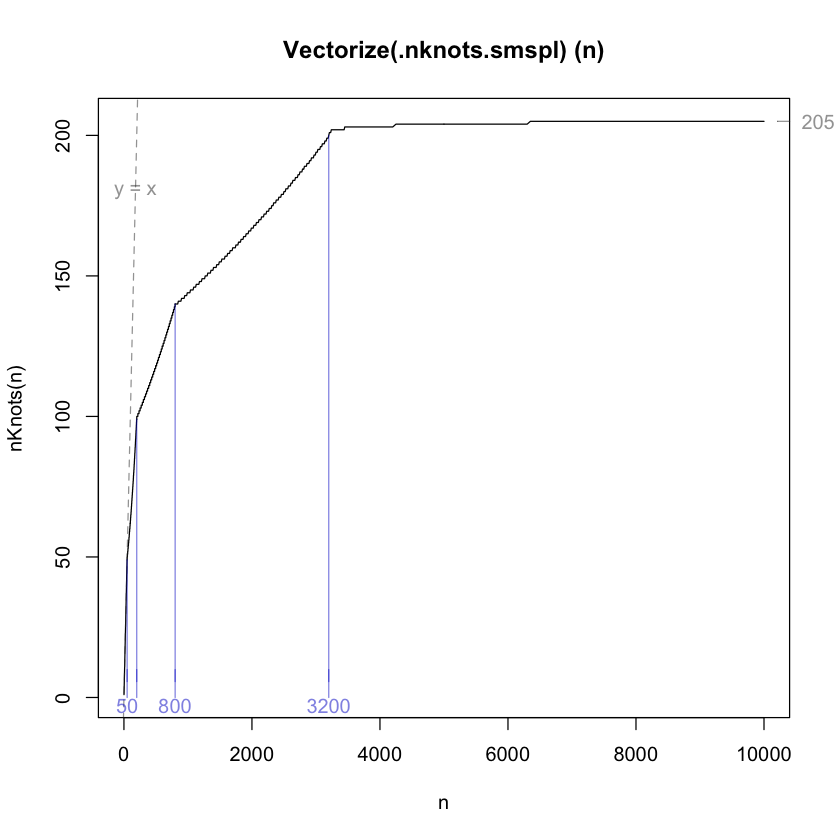

sbart (ratio =   3.5942194e-05) iterations; initial tol1 = 3.404154e-07 :
       spar            GCV      b - a           e  Kind   NEW lspar         crit
 -------------------------------------------------------------------------------
-0.35410197     1.44773374 3.0000e+00           0 GS -- 5.07753e-05     0.747824
 0.35410197    0.747823625 1.8541e+00      1.8541 FP GS   0.0737682      2.83649
 0.35410197    0.747823625 1.1459e+00      1.1459 FP PI 7.20379e-07      1.38165
 0.35410197    0.747823625 6.9350e-01     0.43769 FP GS  0.00081943      1.21231
 0.35410197    0.747823625 4.2299e-01     0.43769 FP PI 3.17624e-05     0.805043
 0.35410197    0.747823625 1.9538e-01     0.16718 FP PI 7.97404e-05     0.718618
 0.38123466    0.718617706 1.6718e-01     -0.0282 FP GS 0.000194162     0.760972
 0.38123466    0.718617706 8.0628e-02     0.14005 FP PI 9.36448e-05     0.715624
 0.39089669    0.715623968 5.3495e-02    0.053495 FP PI 9.77925e-05     0.715551
 0.39350189    0.715550822 4.3833e-

Call:
smooth.spline(x = y18, control.spar = list(trace = TRUE, tol = 1e-06, 
    low = -1.5))

Smoothing Parameter  spar= 0.392796  lambda= 9.665147e-05 (15 iterations)
Equivalent Degrees of Freedom (Df): 8.495582
Penalized Criterion: 3.59097
GCV: 0.715539

sbart (ratio =   3.5942194e-05) iterations; initial tol1 = 3.404154e-07 :
       spar             CV      b - a           e  Kind   NEW lspar         crit
 -------------------------------------------------------------------------------
-0.35410197     1.11299262 3.0000e+00           0 GS -- 5.07753e-05      0.62488
 0.35410197     0.62487989 1.8541e+00      1.8541 FP GS   0.0737682      2.64119
 0.35410197     0.62487989 1.1459e+00      1.1459 FP PI 4.85377e-07      1.07638
 0.35410197     0.62487989 7.1723e-01     0.43769 FP GS  0.00081943      1.10411
 0.35410197     0.62487989 4.4672e-01     0.43769 FP PI 1.89429e-05     0.725088
 0.35410197     0.62487989 2.2645e-01     0.16718 FP GS 0.000146897      0.62365
 0.41796068    0.623650331 1.6718e-01     0.16718 FP PI 8.73889e-05     0.605295
 0.38674050     0.60529534 6.3859e-02    0.063859 FP PI 8.71107e-05     0.605306
 0.38674050     0.60529534 3.1412e-02    -0.03122 FP PI 8.92353e-05      0.60526
 0.38799735    0.605259688 3.1220e-

Call:
smooth.spline(x = y18, cv = TRUE, control.spar = list(trace = TRUE, 
    tol = 1e-06, low = -1.5))

Smoothing Parameter  spar= 0.3881247  lambda= 8.942401e-05 (15 iterations)
Equivalent Degrees of Freedom (Df): 8.636047
Penalized Criterion: 3.488101
PRESS: 0.6052594

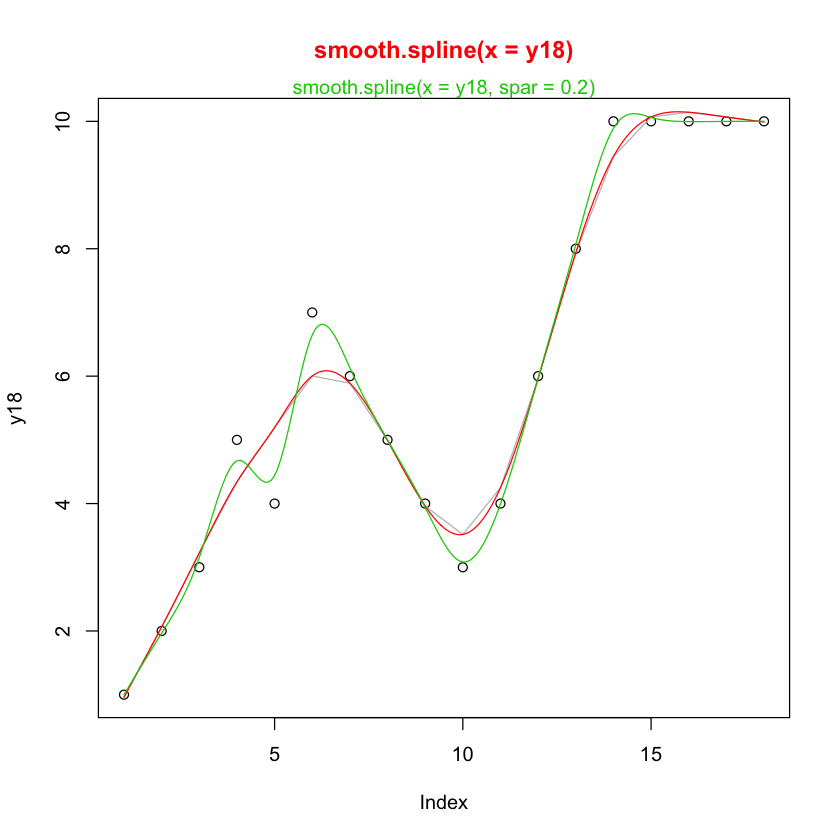

In [1]:
require(graphics)

attach(cars)
plot(speed, dist, main = "data(cars)  &  smoothing splines")
cars.spl <- smooth.spline(speed, dist)
(cars.spl)
## This example has duplicate points, so avoid cv = TRUE

lines(cars.spl, col = "blue")
lines(smooth.spline(speed, dist, df = 10), lty = 2, col = "red")
legend(5,120,c(paste("default [C.V.] => df =",round(cars.spl$df,1)),
               "s( * , df = 10)"), col = c("blue","red"), lty = 1:2,
       bg = 'bisque')
detach()


## Residual (Tukey Anscombe) plot:
plot(residuals(cars.spl) ~ fitted(cars.spl))
abline(h = 0, col = "gray")

## consistency check:
stopifnot(all.equal(cars$dist,
                    fitted(cars.spl) + residuals(cars.spl)))

## Visualize the behavior of  .nknots.smspl()
nKnots <- Vectorize(.nknots.smspl) ; c.. <- adjustcolor("gray20",.5)
curve(nKnots, 1, 250, n=250)
abline(0,1, lty=2, col=c..); text(90,90,"y = x", col=c.., adj=-.25)
abline(h=100,lty=2); abline(v=200, lty=2)

n <- c(1:799, seq(800, 3490, by=10), seq(3500, 10000, by = 50))
plot(n, nKnots(n), type="l", main = "Vectorize(.nknots.smspl) (n)")
abline(0,1, lty=2, col=c..); text(180,180,"y = x", col=c..)
n0 <- c(50, 200, 800, 3200); c0 <- adjustcolor("blue3", .5)
lines(n0, nKnots(n0), type="h", col=c0)
axis(1, at=n0, line=-2, col.ticks=c0, col=NA, col.axis=c0)
axis(4, at=.nknots.smspl(10000), line=-.5, col=c..,col.axis=c.., las=1)

##-- artificial example
y18 <- c(1:3, 5, 4, 7:3, 2*(2:5), rep(10, 4))
xx  <- seq(1, length(y18), len = 201)
(s2  <- smooth.spline(y18)) # GCV
(s02  <- smooth.spline(y18, spar = 0.2))
(s02. <- smooth.spline(y18, spar = 0.2, cv = NA))
plot(y18, main = deparse(s2$call), col.main = 2)
lines(s2, col = "gray"); lines(predict(s2, xx), col = 2)
lines(predict(s02, xx), col = 3); mtext(deparse(s02$call), col = 3)


## The following shows the problematic behavior of 'spar' searching:
(s2  <- smooth.spline(y18, control =
                      list(trace = TRUE, tol = 1e-6, low = -1.5)))
(s2m <- smooth.spline(y18, cv = TRUE, control =
                      list(trace = TRUE, tol = 1e-6, low = -1.5)))
## both above do quite similarly (Df = 8.5 +- 0.2)